In [7]:
# Importing Library

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

In [8]:
# Reading Train and Test Dataset

train_df= pd.read_excel("D:\\ResoluteAI Assignment\\data\\train.xlsx")
test_df= pd.read_excel("D:\\ResoluteAI Assignment\\data\\test.xlsx")

In [9]:
# Dataset View

train_df.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33


In [10]:
# Shape of Dataset

train_df.shape

(36752, 19)

In [11]:
# Dataset Info

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36752 entries, 0 to 36751
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1      36752 non-null  int64 
 1   T2      36752 non-null  int64 
 2   T3      36752 non-null  int64 
 3   T4      36752 non-null  int64 
 4   T5      36752 non-null  int64 
 5   T6      36752 non-null  int64 
 6   T7      36752 non-null  int64 
 7   T8      36752 non-null  int64 
 8   T9      36752 non-null  int64 
 9   T10     36752 non-null  int64 
 10  T11     36752 non-null  int64 
 11  T12     36752 non-null  int64 
 12  T13     36752 non-null  int64 
 13  T14     36752 non-null  int64 
 14  T15     36752 non-null  int64 
 15  T16     36752 non-null  int64 
 16  T17     36752 non-null  int64 
 17  T18     36752 non-null  int64 
 18  target  36752 non-null  object
dtypes: int64(18), object(1)
memory usage: 5.3+ MB


In [12]:
# Describe Dataset

train_df.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
count,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000
mean,-65.865449,-64.521931,-64.574472,-65.296474,-64.462152,-63.318731,-67.030202,-66.591260,-65.692479,-65.555181,-65.681922,-66.244204,-63.962614,-64.399080,-64.550011,-64.136782,-65.910726,-66.590417
std,8.737286,8.914559,8.154517,8.142803,8.068375,8.651501,9.257529,10.160193,10.598247,10.408147,9.453958,8.866239,8.254217,9.562839,9.207343,10.540542,10.071973,10.600992
min,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000
25%,-72.000000,-70.000000,-70.000000,-70.000000,-69.000000,-69.000000,-74.000000,-75.000000,-73.000000,-73.000000,-71.000000,-72.000000,-69.000000,-70.000000,-70.000000,-71.000000,-72.000000,-74.000000
50%,-66.000000,-65.000000,-64.000000,-66.000000,-65.000000,-63.000000,-66.000000,-66.000000,-65.000000,-65.000000,-65.000000,-66.000000,-63.000000,-64.000000,-65.000000,-63.000000,-65.000000,-66.000000
75%,-61.000000,-59.000000,-59.000000,-61.000000,-59.000000,-57.000000,-60.000000,-59.000000,-58.000000,-58.000000,-59.000000,-61.000000,-58.000000,-58.000000,-58.000000,-57.000000,-59.000000,-59.000000
max,-41.000000,-37.000000,-41.000000,-39.000000,-36.000000,-39.000000,-45.000000,-39.000000,-39.000000,-37.000000,-40.000000,-43.000000,-43.000000,-39.000000,-38.000000,-40.000000,-43.000000,-39.000000


In [13]:
# Check Null Values

train_df.isnull().sum()

T1        0
T2        0
T3        0
T4        0
T5        0
T6        0
T7        0
T8        0
T9        0
T10       0
T11       0
T12       0
T13       0
T14       0
T15       0
T16       0
T17       0
T18       0
target    0
dtype: int64

In [14]:
# Check Duplicates 

train_df.duplicated().sum()

1267

In [15]:
# Locating Duplicate Values

train_df.loc[train_df.duplicated()]

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
870,-61,-60,-56,-55,-49,-62,-72,-63,-66,-68,-64,-61,-57,-59,-64,-65,-66,-68,B29
889,-64,-70,-63,-68,-61,-57,-61,-56,-66,-70,-68,-65,-73,-65,-49,-45,-52,-50,A72
995,-67,-66,-63,-59,-61,-43,-64,-65,-82,-61,-59,-75,-57,-52,-53,-55,-59,-65,A48
1084,-67,-65,-63,-60,-62,-48,-64,-65,-80,-61,-58,-75,-57,-52,-53,-55,-59,-64,A48
1887,-65,-67,-65,-65,-60,-56,-78,-76,-78,-64,-62,-70,-57,-70,-59,-64,-79,-69,A34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36673,-64,-57,-70,-64,-77,-69,-79,-80,-78,-55,-47,-62,-62,-80,-69,-67,-79,-79,A18
36704,-63,-71,-65,-71,-77,-68,-95,-80,-75,-63,-68,-70,-81,-95,-75,-95,-82,-95,B5
36707,-64,-72,-63,-68,-61,-57,-62,-54,-65,-70,-67,-65,-72,-65,-49,-44,-50,-50,A72
36714,-64,-67,-63,-68,-69,-64,-60,-79,-67,-75,-71,-63,-58,-51,-50,-55,-61,-57,A49


In [16]:
# Removing Duplicates

train_df=train_df.drop_duplicates()

In [17]:
# Checking Duplicates if any

train_df.duplicated().sum()

0

In [18]:
# Data Split

x_train= train_df.iloc[:, :-1]
y_train= train_df.iloc[:,-1]

In [19]:
# Model Training

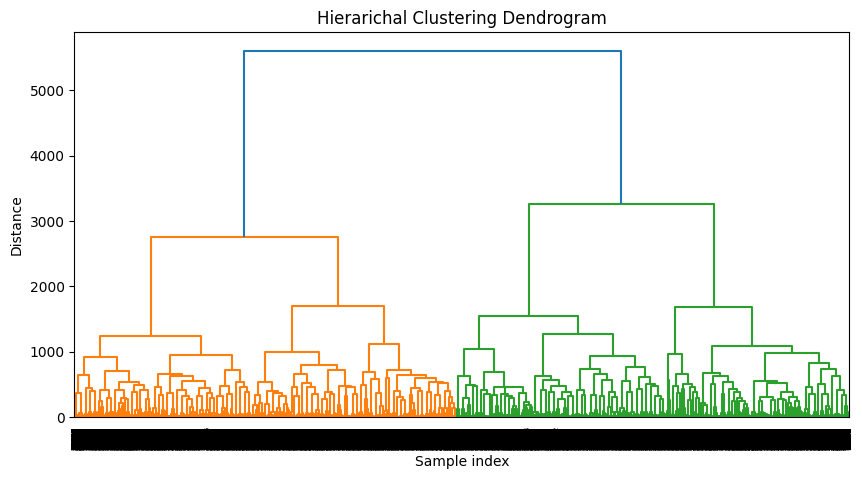

In [20]:
# Ploting dendrogram for Hierarichal Clustering(Bottom-Up)
plt.figure(figsize=(10, 5))
plt.title("Hierarichal Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
Z = linkage(x_train, method='ward')
dendrogram(Z)
plt.show()

In [21]:
# I'm putting dendogram at distnace 2000 to 3000, which gives me 4 cluster.

In [22]:
# Model 1: K-Means Algorithm

#### Finding Optimal No. of Cluster

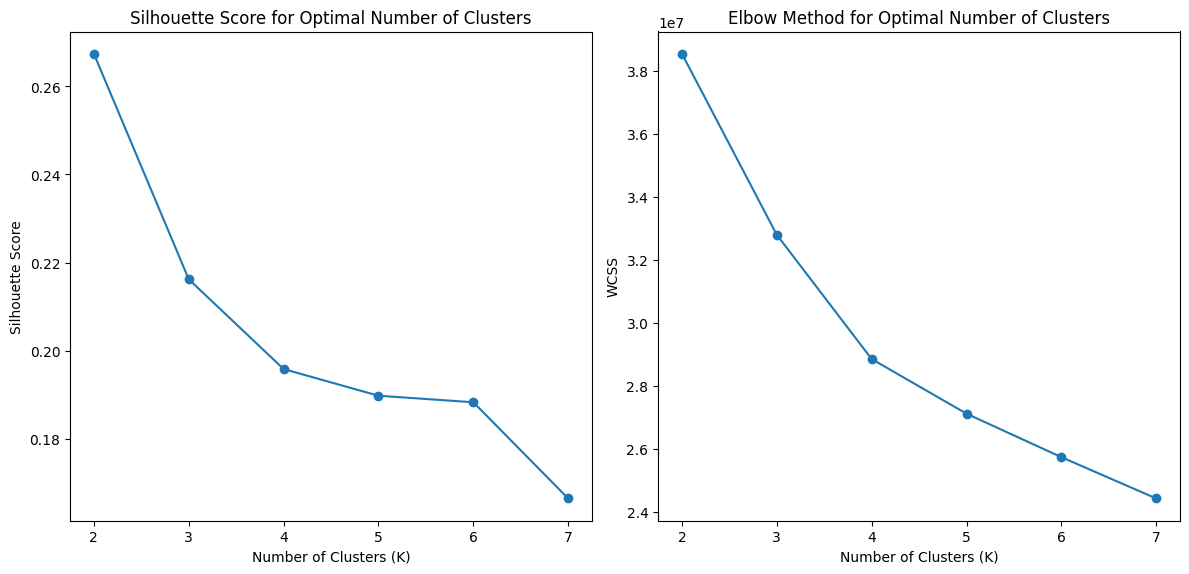

In [23]:
# Cluster Range
num_clusters_range = range(2, 8)

# Calculating silhouette scores and WCSS
silhouette_scores = []
wcss_scores = []
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(x_train)
    silhouette_scores.append(silhouette_score(x_train, kmeans.labels_))
    wcss_scores.append(kmeans.inertia_)

# Visualize the silhouette scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')

# Visualize the WCSS scores
plt.subplot(1, 2, 2)
plt.plot(num_clusters_range, wcss_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')

plt.tight_layout()
plt.show()


##### Silhouette Score give value -1 to 1,whichever no of cluster will give the highest silhouette score, will be the optimal cluster.

##### Elbow point method also helps to determine the optimal number of cluster and by examining the graph, the elbow point is 4.

In [24]:
kmeans = KMeans(n_init=4, random_state=42)
kmeans.fit(x_train)

KMeans(n_init=4, random_state=42)

In [25]:
# Model 2: Agglomerative Clustering Algorithm

In [26]:
agg_cluster = AgglomerativeClustering(n_clusters=4)
agg_cluster.fit(x_train)

AgglomerativeClustering(n_clusters=4)

In [27]:
# Evaluate clustering algorithms

silhouette_scores={"Agglomerative Clustering": silhouette_score(x_train, agg_cluster.labels_)}
silhouette_score

<function sklearn.metrics.cluster._unsupervised.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)>

In [28]:
adjusted_rand_scores = {
    "KMeans": adjusted_rand_score(y_train, kmeans.labels_),
    "Agglomerative Clustering": adjusted_rand_score(y_train, agg_cluster.labels_)
}

In [29]:
normalized_mutual_info_scores = {
    "KMeans": normalized_mutual_info_score(y_train, kmeans.labels_),
    "Agglomerative Clustering": normalized_mutual_info_score(y_train, agg_cluster.labels_)
}

In [30]:
print("\nAdjusted Rand Index:")
for alg, score in adjusted_rand_scores.items():
    print(f"{alg}: {score}")


Adjusted Rand Index:
KMeans: 0.07393561641185084
Agglomerative Clustering: 0.03758013382982139


In [31]:
print("\nNormalized Mutual Information:")
for alg, score in normalized_mutual_info_scores.items():
    print(f"{alg}: {score}")


Normalized Mutual Information:
KMeans: 0.5370502204939388
Agglomerative Clustering: 0.4111445948749532


In [32]:
kmeans_predicted_clusters = kmeans.predict(test_df)
agg_predicted_clusters = agg_cluster.fit_predict(test_df)

In [33]:
print("\nPredicted Clusters for Test Dataset:")
print("KMeans Predicted Clusters:", kmeans_predicted_clusters)
print("Agglomerative Clustering Predicted Clusters:", agg_predicted_clusters)


Predicted Clusters for Test Dataset:
KMeans Predicted Clusters: [0 6 0 ... 0 1 0]
Agglomerative Clustering Predicted Clusters: [1 0 1 ... 1 3 1]


In [34]:
task1_output = {
    'KMeans Predicted Clusters': kmeans_predicted_clusters,
    'Agglomerative Clustering Predicted Clusters': agg_predicted_clusters
}

In [35]:
df_task1 = pd.DataFrame(task1_output)

In [36]:

# To CSV
df_task1.to_csv('task1_output.csv', index=False)